## Poznajemy możliwości MLPClassifier z sklearn.neural_network
Zapoznaj się z **całością**:
1. źródeł funkcji aktywacji: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/neural_network/_base.py
2. dokumentacji API &ndash; metody i parametry: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
3. opisu działania: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

## Tworzymy malutki zbiór danych i prostą sieć

layer weight matrix shapes: [(2, 4), (4, 4), (4, 1)]
detected layer sizes: [2, 4, 4, 1]


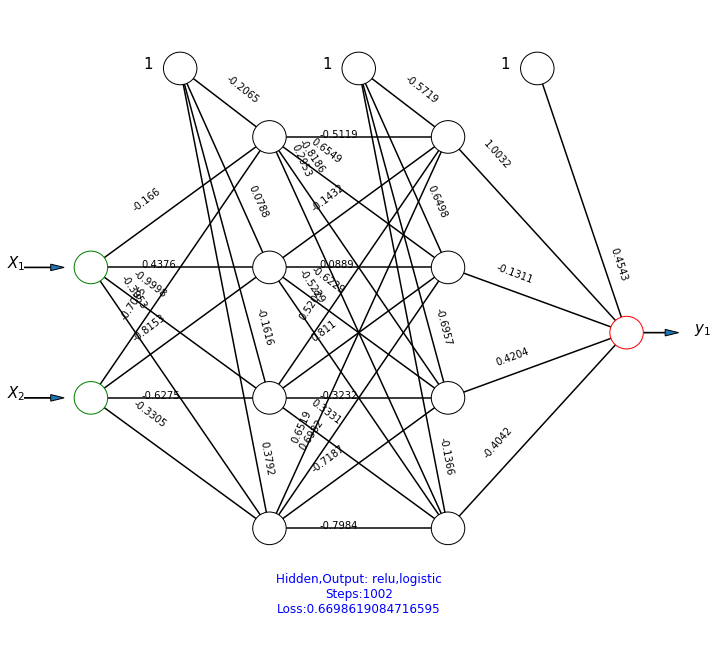

In [358]:
from sklearn.neural_network import MLPClassifier
from NN_helpers import draw_nn
X = [[0,0],[0,1],[1,0],[1,1],[0.8,0.6]] #pięć dwu-atrybutowych przykładów
y = [0, 1, 1, 1, 0] #...i ich liczbowe "klasy decyzyjne"
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(4,4), random_state=1, 
                    max_iter=10000, n_iter_no_change=1000)
clf.fit(X, y) #tu zachodzi uczenie
draw_nn(clf) #obejrzyj źródła tej funkcji, możesz ją ulepszyć!

## Rysujemy rzut z góry na wyjście próbkując wartości wejść

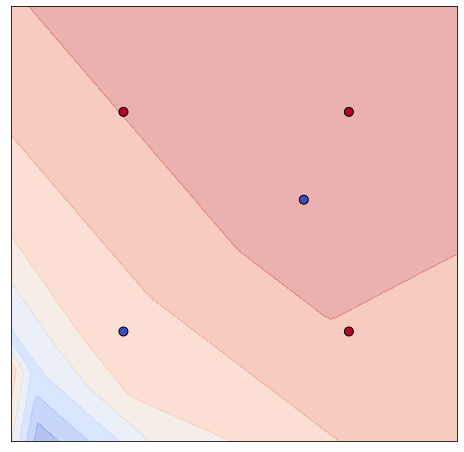

In [359]:
from NN_helpers import draw_response
draw_response(clf,X,y) #obejrzyj i przeanalizuj źródło tej funkcji!

## ...a teraz zamiast rzutu z góry, pełen widok 3D

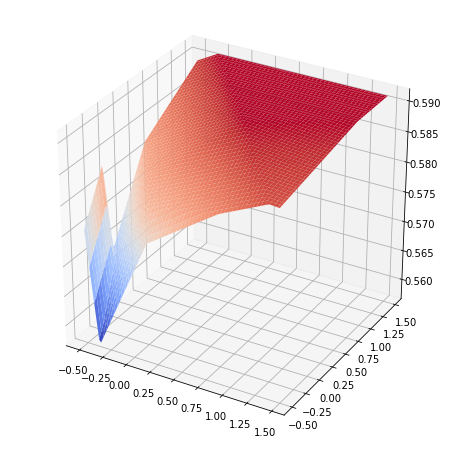

In [360]:
from NN_helpers import draw_response3D
draw_response3D(clf,X,y) #obejrzyj i przeanalizuj źródło tej funkcji!
#możesz ją ulepszyć, żeby rysowała kropki w 3D tak jak poprzednia rysuje je w 2D

## Mini-zadanie programistyczne
Na podstawie funkcji ``draw_response3D(clf,X,y)`` napisz podobną funkcję ``draw_output3D()``, która jako argument dostaje sieć neuronową, numer warstwy, numer neuronu w tej warstwie, i dwa numery wejść. Funkcja ta ma &ndash; analogicznie do ``draw_response3D()`` &ndash; wykreślać, jak zmienia się wyjście wybranego neuronu w funkcji jego dwóch wybranych wejść.

## Tak dowiadujemy się o macierze wag pomiędzy warstwami (rozmiary i, jeśli trzeba, wartości):

In [361]:
[coef.shape for coef in clf.coefs_]

[(2, 4), (4, 4), (4, 1)]

In [362]:
clf.coefs_

[array([[-0.166 ,  0.4376, -0.9998, -0.3953],
        [-0.7065, -0.8153, -0.6275, -0.3305]]),
 array([[-0.5119,  0.6549, -0.8186,  0.2953],
        [-0.1432,  0.0889, -0.6229, -0.5229],
        [ 0.5209,  0.811 , -0.3232,  0.3331],
        [ 0.6519,  0.6982, -0.7187, -0.7984]]),
 array([[ 1.0032],
        [-0.1311],
        [ 0.4204],
        [-0.4042]])]

In [363]:
len(clf.coefs_[0][0])

4

In [364]:
len(clf.coefs_[2])

4

## Jeśli chcemy mieć kontrolę nad pojedynczymi krokami uczenia i chcemy sami je kontynuować, używamy ``warm_start``

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 0 	accuracy 0.4 	loss 0.8268182609714202
iter 50 	accuracy 0.6 	loss 0.7237687199253379
iter 100 	accuracy 0.6 	loss 0.6985827232305021
iter 150 	accuracy 0.6 	loss 0.6825289510448932
iter 200 	accuracy 0.8 	loss 0.6731609921588257
iter 250 	accuracy 0.8 	loss 0.663702404802986
iter 300 	accuracy 0.8 	loss 0.6537733754301756
iter 350 	accuracy 0.8 	loss 0.6424541578600267
iter 400 	accuracy 0.8 	loss 0.630893097444644
iter 450 	accuracy 0.8 	loss 0.6180300971007582
iter 500 	accuracy 0.8 	loss 0.6039284157569674
iter 550 	accuracy 0.8 	loss 0.5889620442214822
iter 600 	accuracy 0.8 	loss 0.5736347497816042
iter 650 	accuracy 0.8 	loss 0.5586407637804659
iter 700 	accuracy 0.8 	loss 0.5444767670304498
iter 750 	accuracy 0.8 	loss 0.5313555942316701
iter 800 	accuracy 0.8 	loss 0.5195807248683925
iter 850 	accuracy 0.8 	loss 0.5092289123995871
iter 900 	accuracy 0.8 	loss 0.5002687268207907
iter 950 	accuracy 0.8 	loss 0.49261473970637937
iter 1000 	accuracy 0.8 	loss 0.486167714730

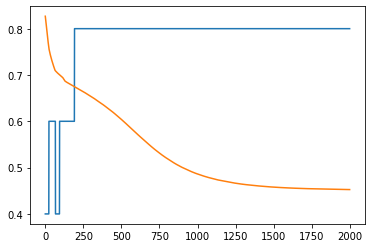

In [365]:
clf = MLPClassifier(hidden_layer_sizes=(10,2), random_state=1, max_iter=1, warm_start=True)
licz=[] #gromadzimy na potrzeby wykresu te trzy parametry
accu=[]
loss=[]
for i in range(2000):
    clf.fit(X, y)
    licz.append(i)
    accu.append(clf.score(X,y))
    loss.append(clf.loss_)
    if i%50==0: #wyświetlaj postęp obliczeń, co 50-ta epoka
        print("iter",i,"\taccuracy",clf.score(X,y),"\tloss",clf.loss_)
import matplotlib.pyplot as plt
plt.plot(licz,accu,loss)

## Przewidywanie klasy dla zadanych przykładów

In [366]:
clf.predict_proba([[2.0, 2.0], [-1.7, -2.0]])
#prawdopodobieństwa każdej klasy dla każdego przypadku (w wierszach sumują się do 1)

array([[2.5862e-01, 7.4138e-01],
       [1.0000e+00, 6.0701e-11]])

In [367]:
clf.predict([[2.0, 2.0], [-1.7, -2.0]]) #wybrane najbardziej prawdopodobne klasy

array([1, 0])

## Uczymy się znajomego zbioru irysków
Zwróć uwagę, że atrybut wyjściowy jest nominalny, stąd MLPClassifier automatycznie używa warstwy wyjściowej softmax. Więcej tutaj: https://stackoverflow.com/questions/47359784/how-scikit-learn-implements-the-output-layer

layer weight matrix shapes: [(4, 2), (2, 2), (2, 3)]
detected layer sizes: [4, 2, 2, 3]


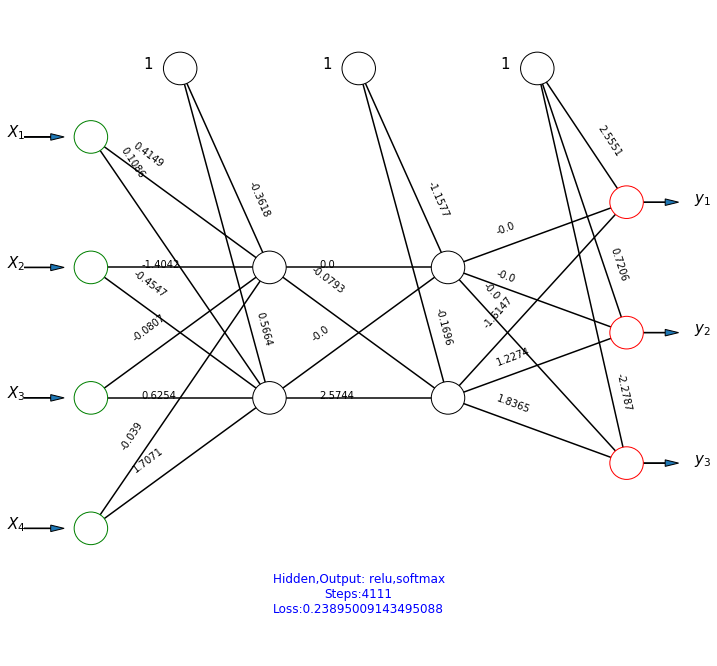

accuracy on learning set: 0.9666666666666667


In [368]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
iris = load_iris()
#...ktoś zapomniał o normalizacji?


scaler = StandardScaler()  
scaler.fit(iris.data) #naucz się parametrów normalizacji tylko na uczącym
X_train = scaler.transform(iris.data) #normalizacja uczącego


clf = MLPClassifier(hidden_layer_sizes=(2,2), random_state=1, max_iter=10000)
clf.fit(X_train, iris.target)
draw_nn(clf)
print("accuracy on learning set:",clf.score(X_train, iris.target))

## Normalizacja i podział na zbiór uczący i testujący

In [369]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X, y = some_dataset
X = StandardScaler().fit_transform(X) #ważne jeśli używamy NN!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 
#podanie random_state pozwala na uzyskanie determinizmu ("seed")

#...ale powyższy przykład najpierw skaluje całość danych, a potem dzieli je na testujące i uczące.
#Tak nie wolno robić, bo wiedza z części uczącej "przecieka" do testującej.
#Bardziej prawidłowo: najpierw podzielić zbiór na część uczącą i testującą, a potem:
scaler = StandardScaler()  
scaler.fit(X_train) #naucz się parametrów normalizacji tylko na uczącym
X_train = scaler.transform(X_train) #normalizacja uczącego
X_test = scaler.transform(X_test) #...i tymi samymi parametrami normalizacja testującego

NameError: name 'some_dataset' is not defined

## Inne gotowe zbiory danych, PIMA, BUPA

Do wykonania ćwiczeń potrzebne będą &ndash; do samodzielnego załadowania &ndash; zbiory oznaczane jako:

- "PIMA":
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv
- "BUPA":
https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data
z kolumnami ['mcv','alkphos','sgpt','sgot','gammagt','drinks','selector']:
https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.names

Do własnych, dodatkowych eksperymentów może się przydać np. ``load_diabetes()`` i ``load_breast_cancer()``.<br>
Zobacz https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

# lab9_zad4 - PIMA

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


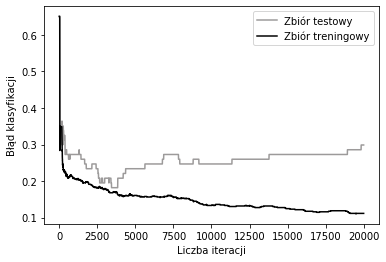

In [464]:
import pandas as pd
pima_data = pd.read_csv("./pima-indians-diabetes.csv",header=None)
X = pima_data.iloc[:, 0:8]
y = pima_data.iloc[:, 8:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(8,4), random_state=1, max_iter=1, 
                    activation='logistic', n_iter_no_change=1, warm_start=True)
accu_test = []
accu_train = []
for i in range(20000):
    clf.fit(X_train_std, y_train[8])
    accu_train.append(1-clf.score(X_train_std,y_train))
    accu_test.append(1-clf.score(X_test_std,y_test))

# clf.fit(X_train_std, y_train[8])
# draw_nn(clf)
# print("accuracy on learning set:",clf.score(X_test_std, y_test))
# print(clf.n_iter_)

fig = plt.figure()
plt.xlabel("Liczba iteracji")
plt.ylabel("Błąd klasyfikacji")

line_up, = plt.plot(accu_test, label='Zbiór testowy', color="#9c9a9a")
line_down, = plt.plot(accu_train, label='Zbiór treningowy', color='black')
plt.legend(handles=[line_up, line_down])

fig.savefig("rysunki/lab9_zad4_wykres.pdf")



# lab9_zad5

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

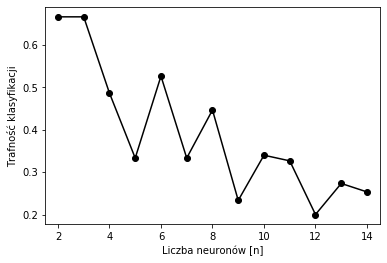

In [466]:
from sklearn.datasets import load_iris
iris = load_iris()

scaler = StandardScaler()
X_train_std = scaler.fit_transform(iris.data)

accu = [None, None]
for n in range(2, 15):
    clf = MLPClassifier(hidden_layer_sizes=(4,n), random_state=1, activation='logistic')
    clf.fit(X_train_std, iris.target)
    accu.append(1-clf.score(X_train_std, iris.target))

fig = plt.figure()
plt.xlabel("Liczba neuronów [n]")
plt.ylabel("Trafność klasyfikacji")
plt.xlim(1.5, 14.5)
plt.plot(accu, color='black', marker='o')
fig.savefig("./rysunki/lab9_zad5_brak_zbieznosc.pdf")

# lab10_zad7_2

In [467]:

import pandas as pd
from sklearn.metrics import confusion_matrix

pima_data = pd.read_csv("./pima-indians-diabetes.csv",header=None)
X = pima_data.iloc[:, 0:8]
y = pima_data.iloc[:, 8:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(8,4), random_state=1, activation='logistic')
clf.fit(X_train_std, y_train)

y_pred = clf.predict(X_test_std)
confusion_matrix(y_test, y_pred, labels=[0,1])

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[44,  6],
       [15, 12]], dtype=int64)

# lab10_zad7_4

In [468]:
import pandas as pd
from sklearn.metrics import confusion_matrix

pima_data = pd.read_csv("./pima-indians-diabetes.csv",header=None)
X = pima_data.iloc[:, 0:8]
y = pima_data.iloc[:, 8:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(8,4), random_state=1, activation='logistic', max_iter=1000)
clf.fit(X_train_std, y_train)

y_pred_proba = clf.predict_proba(X_test_std)
y_pred = clf.predict(X_test_std)
print("accuracy on learning set:",clf.score(X_test_std, y_test))

# confusion_matrix(y_test, y_pred, labels=[0,1])

def klasyfikuj(y_pred_proba, K0, K1):
    assert (K1 >= K0),"Musi być spełnione K1 >= K0."

    classes = []
    for result in y_pred_proba:
        if result[1] <= K0:
            classes.append(0)
        elif result[1] >= K1:
            classes.append(1)
        else:
            classes.append(-1)
    return classes

# draw_nn(clf)

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy on learning set: 0.7142857142857143


In [469]:
def compare_results(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    compare = y_true==y_pred
    compare = compare[0]

    good = len(compare[compare==True])/len(y_true) 
    not_classified = len(y_pred[y_pred==-1])/len(y_true)   
    bad = 1-(good+not_classified)
    
    return good, bad, not_classified

In [470]:
import collections

K1 = [0.50001, 0.6, 0.7, 0.8, 0.9, 1.0]
K0 = [0.49999, 0.4, 0.3, 0.2, 0.1, 0.0]
result = []
for x in list(zip(K0, K1)):
    my_pred = klasyfikuj(y_pred_proba, x[0],x[1])
    result.append(compare_results(y_test, my_pred))
result = np.array(result)
result


array([[0.5974, 0.4026, 0.    ],
       [0.5195, 0.3506, 0.1299],
       [0.4416, 0.2597, 0.2987],
       [0.3247, 0.013 , 0.6623],
       [0.2727, 0.    , 0.7273],
       [0.    , 0.    , 1.    ]])

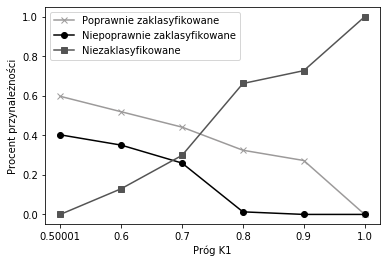

In [471]:
good = result[:,0]
bad = result[:,1]
not_classified = result[:,2]

fig = plt.figure()
plt.xlabel("Próg K1")
plt.ylabel("Procent przynależności")

xi = list(range(len(K1)))
plt.xticks(xi, K1)

good_plot, = plt.plot(good, label='Poprawnie zaklasyfikowane', color="#9c9a9a", marker='x')
bad_plot, = plt.plot(bad, label='Niepoprawnie zaklasyfikowane', color='black', marker='o')
not_classified_plot, = plt.plot(not_classified, label='Niezaklasyfikowane', color='#545454', marker='s')
plt.legend(handles=[good_plot, bad_plot,not_classified_plot])

fig.savefig("rysunki/lab10_zad7.pdf")


# lab10_zad8

In [477]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris_data = load_iris()
X = iris_data.data
y = iris_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(4,3), random_state=1, activation='logistic', max_iter=10000)
clf.fit(X_train_std, y_train)

# y_pred_proba = clf.predict_proba(X_test_std)
# y_pred = clf.predict(X_test_std)


# confusion_matrix(y_test, y_pred, labels=[0,1])

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [478]:
# print("accuracy on learning set:",clf.score(X_test_std, y_test))

In [479]:
def remove_min_weight(coefs):
    min = (np.inf, (0,0,0))
    for i, layer in enumerate(coefs):
        for j, neuron in enumerate(layer):
            for k, weight in enumerate(neuron):
                if abs(weight) <  min[0] and  weight != 0:
                    min = (abs(weight), (i,j,k))
    i = min[1][0]
    j = min[1][1]
    k = min[1][2]

    coefs[i][j][k] = 0 
    return coefs

In [480]:
# weights = []
# for l_idx, layer in enumerate(clf.coefs_):
#     if l_idx == 0:
#         continue
#     for idx,  weight in np.ndenumerate(layer):
#         weights.append((l_idx, idx, weight))
        
# sorted_weights = sorted(weights, key=lambda w: abs(w[2]))
# sorted_weights

In [481]:
accu = []
accu.append(clf.score(X_test_std, y_test))
for _ in range(15):
    clf.coefs_[1:] = remove_min_weight(clf.coefs_[1:])
    accu.append(clf.score(X_test_std, y_test))
accu

[0.6,
 0.8,
 0.8,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.8,
 0.6,
 0.6,
 0.6,
 0.6,
 0.4]

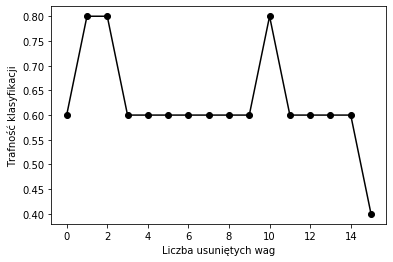

In [482]:
fig = plt.figure()
plt.xlabel("Liczba usuniętych wag")
plt.ylabel("Trafność klasyfikacji")
plt.plot(accu, color='black', marker='o')
fig.savefig("./rysunki/lab10_zad8_rs1.pdf")

layer weight matrix shapes: [(4, 4), (4, 3), (3, 3)]
detected layer sizes: [4, 4, 3, 3]


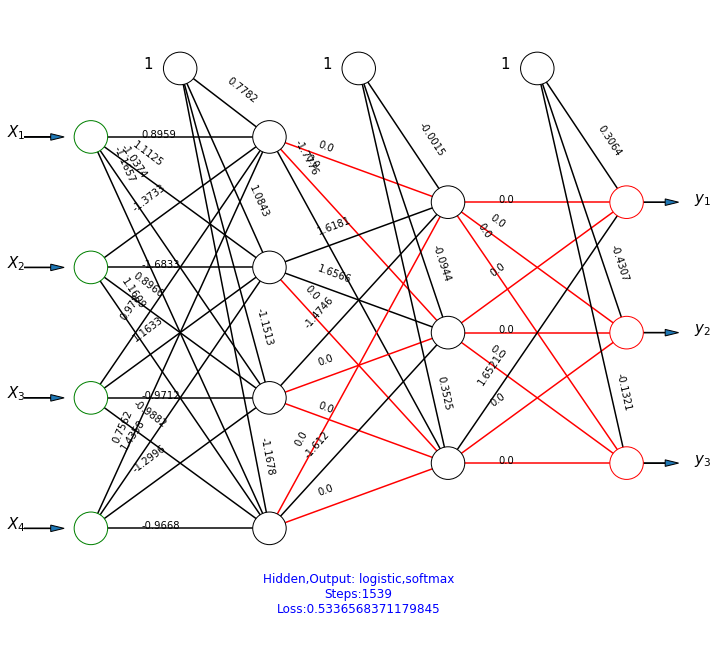

In [483]:
draw_nn(clf, save_path="./rysunki/lab10_zad8_clf_rs1.pdf")

# lab_10_zad9

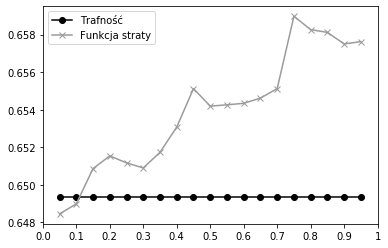

In [484]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

pima_data = pd.read_csv("./pima-indians-diabetes.csv",header=None)
X = pima_data.iloc[:, 0:8]
y = pima_data.iloc[:, 8:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

accu = [None, None]
loss = [None, None]
frac_range = np.arange(0.05, 1, 0.05)
for val_frac in frac_range:
    clf = MLPClassifier(hidden_layer_sizes=(8,4), random_state=42, activation='logistic', max_iter=500, 
                        early_stopping=True, validation_fraction=val_frac)
    clf.fit(X_train_std, y_train[8])
    accu.append(clf.score(X_test_std, y_test))
    loss.append(clf.loss_)

fig = plt.figure()

a, = plt.plot(accu, color="black", marker='o', label='Trafność')
l, = plt.plot(loss, color="#9c9a9a", marker='x',  label='Funkcja straty')

plt.xticks(np.arange(1,22,2), [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.legend(handles=[a, l])
plt.show()
fig.savefig('./rysunki/lab10_zad9.pdf')

# lab10_zad12

In [182]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

pima_data = pd.read_csv("./pima-indians-diabetes.csv",header=None)
X = pima_data.iloc[:, 0:8]
y = pima_data.iloc[:, 8:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
# clf = MLPClassifier(hidden_layer_sizes=(8,4), random_state=42, activation='logistic', max_iter=500, 
#                         early_stopping=True, validation_fraction=val_frac)

parameters = {'hidden_layer_sizes':((8,8,8), (8,6,6), (8,6,4), (8,4), (8), (4)), 
              'random_state': [42],
              'activation': ('identity', 'logistic', 'tanh', 'relu'),
              'solver': ('lbfgs','adam'),
              'alpha': (0.00001,0.0001,0.001,0.1),
              'tol':(0.00001,0.0001,0.001,0.1),
              'max_iter':(1000,5000)
             }

clf = GridSearchCV(MLPClassifier(), parameters)
clf.fit(X_train_std, y_train[8])

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn'

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/s

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum it

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn'

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn'

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/s

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn'

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn'

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn'

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum it

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn'

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn'

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn'

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn'

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn'

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum it

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn'

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn'

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ('identity', 'logistic', 'tanh', 'relu'),
                         'alpha': (1e-05, 0.0001, 0.001, 0.1),
                         'hidden_layer_sizes': ((8, 8, 8), (8, 6, 6), (8, 6, 4),
             

In [187]:
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.1,
 'hidden_layer_sizes': (8, 8, 8),
 'max_iter': 1000,
 'random_state': 42,
 'solver': 'adam',
 'tol': 0.001}

In [357]:
import statistics
accu = []
for i in range(0, 30):
    myClf = MLPClassifier(hidden_layer_sizes=(10), random_state=i, activation='relu', max_iter=2000,
                          alpha=0.1, solver='lbfgs', tol=0.001)
    myClf.fit(X_train_std, y_train[8])
    accu.append(myClf.score(X_test_std, y_test))
print(statistics.mean(accu))
print(statistics.stdev(accu))
print(max(accu))

0.7056277056277056
0.04541721111933078
0.8051948051948052


In [339]:
import statistics
accu = []
for i in range(0, 30):
    myClf = MLPClassifier(hidden_layer_sizes=(8,6), random_state=i, activation='relu', max_iter=1000,
                          alpha=0.1, solver='adam', tol=0.001, learning_rate_init=0.001)
    myClf.fit(X_train_std, y_train[8])
    accu.append(myClf.score(X_test_std, y_test))
print(statistics.mean(accu))
print(statistics.stdev(accu))
print(max(accu))

0.7103896103896103
0.03769398117835873
0.7792207792207793


In [259]:
myClf = MLPClassifier(hidden_layer_sizes=(8), random_state=42, activation='identity', max_iter=100,
                      alpha=0.1, solver='adam', tol=0.001, learning_rate_init=0.001)
myClf.fit(X_train_std, y_train[8])
myClf.score(X_test_std, y_test)

0.7012987012987013

In [192]:
myClf

MLPClassifier(activation='tanh', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [213]:
clf.

NoneType

In [186]:
clf.best_estimator_.score(X_test_std, y_test)

0.7142857142857143

In [183]:
nn = clf.decision_function()
nn.score(X_test, y_test)

AttributeError: 'MLPClassifier' object has no attribute 'decision_function'

In [326]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

pima_data = pd.read_csv("./pima-indians-diabetes.csv",header=None)
X = pima_data.iloc[:, 0:8]
y = pima_data.iloc[:, 8:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

import statistics
accu = []
for i in range(0, 30):
    tree = DecisionTreeClassifier(random_state=i)
    tree.fit(X_train_std, y_train[8])
    accu.append(tree.score(X_test_std, y_test))
print(statistics.mean(accu))
print(statistics.stdev(accu))
print(max(accu))

0.7826839826839828
0.01633273311246381
0.8181818181818182


In [342]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

pima_data = pd.read_csv("./pima-indians-diabetes.csv",header=None)
X = pima_data.iloc[:, 0:8]
y = pima_data.iloc[:, 8:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

import statistics
accu = []
for i in range(0, 30):
    forest = RandomForestClassifier(random_state=i, oob_score=True)
    forest.fit(X_train_std, y_train[8])
    accu.append(forest.score(X_test_std, y_test))
    
print(statistics.mean(accu))
print(statistics.stdev(accu))
print(max(accu))

0.703030303030303
0.016615164414272524
0.7402597402597403


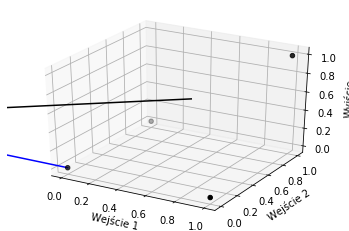

In [424]:
# lab9_zad3_3
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import mpl_toolkits.mplot3d as plt3d
fig = plt.figure()
ax = plt.axes(projection='3d')


xdata = [0,0,1,1]
ydata = [0,1,0,1]
zdata = [0,0,0,1]
ax.set_xlabel("Wejście 1")
ax.set_ylabel("Wejście 2")
ax.set_zlabel("Wyjście")

x1 = [-1.93,0]
x2 = [0,1.53]
z = [0, 0]
line = plt3d.art3d.Line3D(x1,x2,z, color='black')
ax.add_line(line)

x1 = [0,-2.33]
x2 = [0,0]
z = [0, 0]
line = plt3d.art3d.Line3D(x1,x2,z, color='blue')


ax.add_line(line)
ax.scatter3D(xdata, ydata, zdata, color='black');
# plt3d.plot_surface(xx, yy, z, alpha=0.2)
# ax.view_init(0, 60)
    
# fig.savefig("./rysunki/lab9_zad3_3.jpg")

1253
layer weight matrix shapes: [(2, 2), (2, 1)]
detected layer sizes: [2, 2, 1]


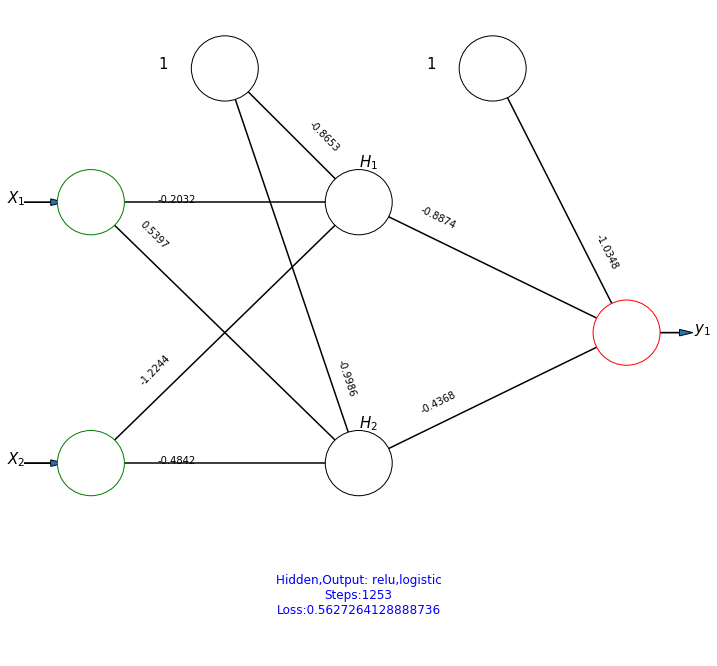

In [463]:
X = [[0,0],[0,1],[1,0],[1,1]] #pięć dwu-atrybutowych przykładów
y = [0, 0, 0, 1] #...i ich liczbowe "klasy decyzyjne"
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), random_state=1, 
                    max_iter=10000, n_iter_no_change=1000)
clf.fit(X, y) #tu zachodzi uczenie
print(clf.n_iter_)
draw_nn(clf) #obejrzyj źródła tej funkcji, możesz ją ulepszyć!

In [445]:
np.arange(-0.25, 1.5, 0.25)

array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25])

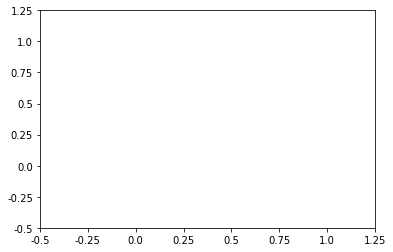

In [455]:
x1 = [0,-2.33]
x2 = [0,0]
# h = plt.plot(x1, x2, color='red')
# plt.xlim([-1.25, -0.25])
plt.xticks(np.arange(0, 8, 1), np.arange(-0.5, 1.50, 0.25))
plt.yticks(np.arange(0, 8, 1), np.arange(-0.5, 1.50, 0.25))

ax.xaxis.set_ticks(np.arange(0, 8, 1), np.arange(-0.5, 1.50, 0.25))
ax.yaxis.set_ticks(np.arange(0, 8, 1), np.arange(-0.5, 1.50, 0.25))
# plt.ylim([-1.5, -0.5])
plt.show()

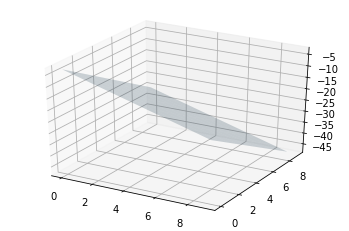

In [437]:
# plot the surface
plt3d = plt.figure().gca(projection='3d')
# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-2 * xx - 3 * yy - 3) * 1. /1
plt3d.plot_surface(xx, yy, z, alpha=0.2)

# Ensure that the next plot doesn't overwrite the first plot
ax = plt.gca()
# ax.hold(True)

# ax.scatter(points2[0], point2[1], point2[2], color='green')
# ax.view_init(0, 60)

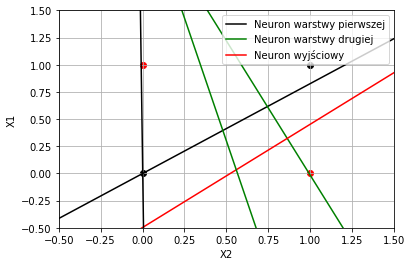

In [462]:
def get_val_for_x1(w1,w2,b,x2):
    return [(-x*w2-b)/w1 for x in x2]

b1 = -0.0055
b2 = 7.5236
b3 = 6.773

neuron1 = [ 4.40729429,  -5.33630324]
neuron2 = [4.36092641,   0.04044785]
neuron3 = [-7.5607575,  -3.06313914]
neuron4 = [ -13.25996912,  -2.93879321]
neuron5 = [ -14.34191875,  15.12442049]

x2 = [i for i in range(-10,10)]
n1 = get_val_for_x1(neuron1[0],neuron1[1],b1,x2)
n2 = get_val_for_x1(neuron2[0],neuron2[1],b1,x2)
n3 = get_val_for_x1(neuron3[0],neuron3[1],b2,x2)
n4 = get_val_for_x1(neuron4[0],neuron4[1],b2,x2)
n5 = get_val_for_x1(neuron5[0],neuron5[1],b2,x2)

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

plt.plot(n1,x2,color='black',label='Neuron warstwy pierwszej')
plt.plot(n3,x2,color='green',label='Neuron warstwy drugiej')
plt.plot(n5,x2,color='red',label='Neuron wyjściowy')
plt.plot(n4,x2,color='green')
plt.plot(n2,x2,color='black')

ax.legend(labels=['Neuron warstwy pierwszej','Neuron warstwy drugiej', 'Neuron wyjściowy'])

plt.xlabel('X2')

plt.ylabel('X1')

ax.xaxis.set_ticks( np.arange(-10, 10, 0.25))
ax.yaxis.set_ticks(np.arange(-10, 10, 0.25))

plt.scatter([0,1],[0,1],color='black')
plt.scatter([0,1],[1,0],color='red')
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.grid()
# plt.ylabel('latitude')